In [1]:
import numpy as np
import os
import pandas as pd 
import unidecode
import unicodedata
import datetime
import random
import datetime
from datetime import datetime, date, timedelta
import math
from math import sqrt
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# Distribución binomial
$P_n(k | p) = \left( \begin{array}{c}n\\k\end{array} \right) p^k\, (1-p)^{n-k} = \frac{n!}{k!\, (n-k)!}  p^k\, (1-p)^{n-k}$

## $P_n(k|p)$ es una distribución sobre $k$ de una función con parámetros $n$ y $p$

## Moneda x 10 veces (1000 repeticiones)

In [2]:
n, p = 10, .5  # número de tiradas, probabilidad de éxito en cada tirada
# s es una variable aleatoria que surge de sumar los éxitos en n Bernoulli independientes con probabilidad de éxito p
s = np.random.binomial(n, p, 1000)
print(s[:20])

[4 4 6 5 6 5 7 5 7 5 5 5 8 5 6 5 5 3 3 7]


In [3]:
math.sqrt(2.5)

1.5811388300841898

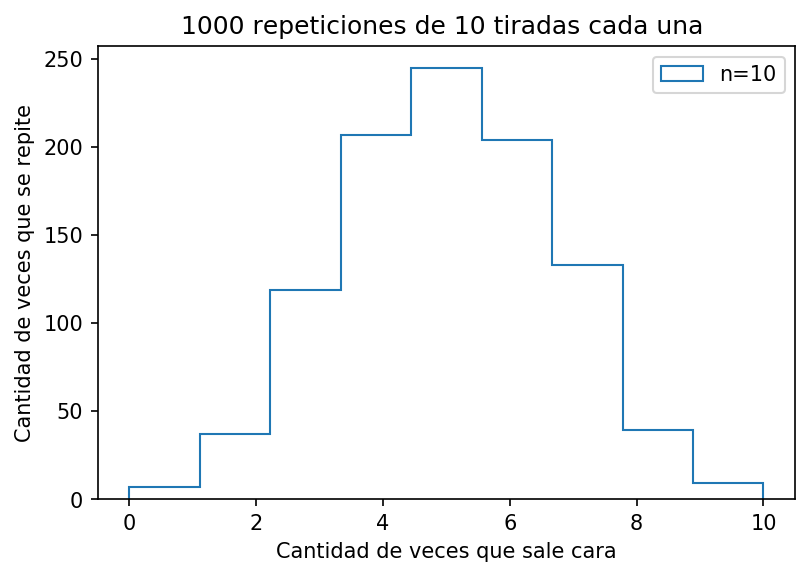

In [4]:
plt.figure(dpi=150)
plt.hist(s,density=False, bins=np.linspace(0,10,10),fill=False, histtype='step', label='n=10')
plt.ylabel('Cantidad de veces que se repite')
plt.xlabel('Cantidad de veces que sale cara')
plt.title('1000 repeticiones de 10 tiradas cada una ')
plt.legend()
plt.show()

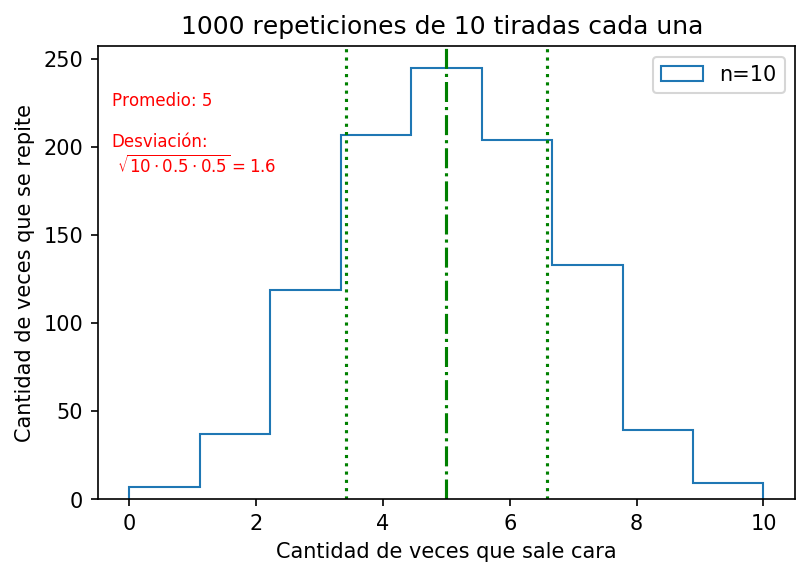

In [5]:
plt.figure(dpi=150)
plt.hist(s,density=False, bins=np.linspace(0,10,10),fill=False, histtype='step', label='n=10')
plt.ylabel('Cantidad de veces que se repite')
plt.xlabel('Cantidad de veces que sale cara')
plt.title('1000 repeticiones de 10 tiradas cada una ')
plt.axvline(x=5, color='g', linestyle='-.')
plt.axvline(x=5+sqrt(10*.5*.5), color='g', linestyle=':')
plt.axvline(x=5-sqrt(10*.5*.5), color='g', linestyle=':')
plt.text(.02,.9,'Promedio: 5\n\nDesviación:\n $\sqrt{10\cdot 0.5 \cdot 0.5} = 1.6$',ha='left',va='top', fontsize=8, color='red',transform = plt.gca().transAxes)
plt.legend()
plt.show()

# Moneda x 100 veces (1000 repeticiones)

In [6]:
n, p = 100, .5  # number of trials, probability of each trial
# s es una variable aleatoria que surge de sumar los éxitos en n Bernoulli independientes con probabilidad de éxito p
s2 = np.random.binomial(n, p, 1000)

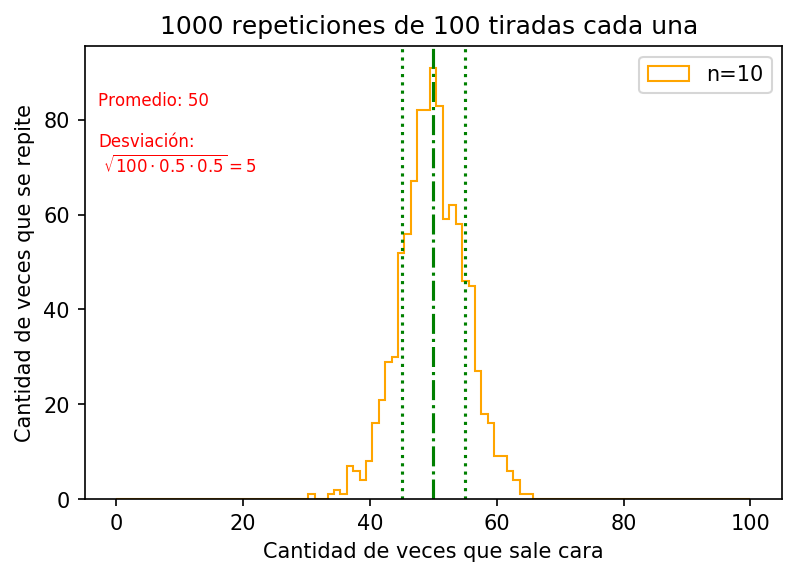

In [7]:
plt.figure(dpi=150)
plt.hist(s2,density=False, bins=np.linspace(0,100,100),fill=False, color='orange',histtype='step', label='n=10')
plt.ylabel('Cantidad de veces que se repite')
plt.xlabel('Cantidad de veces que sale cara')
plt.title('1000 repeticiones de 100 tiradas cada una ')
plt.axvline(x=50, color='g', linestyle='-.')
plt.axvline(x=50+sqrt(100*.5*.5), color='g', linestyle=':')
plt.axvline(x=50-sqrt(100*.5*.5), color='g', linestyle=':')
plt.text(.02,.9,'Promedio: 50\n\nDesviación:\n $\sqrt{100\cdot 0.5 \cdot 0.5} = 5$',ha='left',va='top', fontsize=8, color='red',transform = plt.gca().transAxes)
plt.legend()
plt.show()

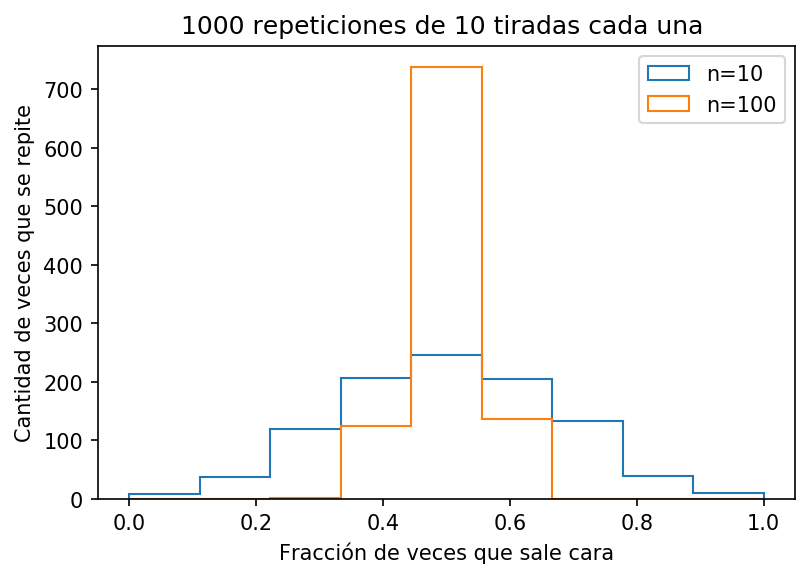

In [8]:
plt.figure(dpi=150)
plt.hist(s/10,density=False, bins=np.linspace(0,1,10),fill=False, histtype='step', label='n=10')
plt.hist(s2/100,density=False, bins=np.linspace(0,1,10),fill=False, histtype='step', label='n=100')
plt.ylabel('Cantidad de veces que se repite')
plt.xlabel('Fracción de veces que sale cara')
plt.title('1000 repeticiones de 10 tiradas cada una ')
plt.legend()
plt.show()

## Covid-19

In [9]:
n, p = 10, .05  # number of trials, probability of each trial
# s es una variable aleatoria que surge de sumar los éxitos en n Bernoulli independientes con probabilidad de éxito p
s = np.random.binomial(n, p, 1000)/n

In [10]:
n, p = 100, .05  # number of trials, probability of each trial
# s es una variable aleatoria que surge de sumar los éxitos en n Bernoulli independientes con probabilidad de éxito p
s2 = np.random.binomial(n, p, 1000)/n

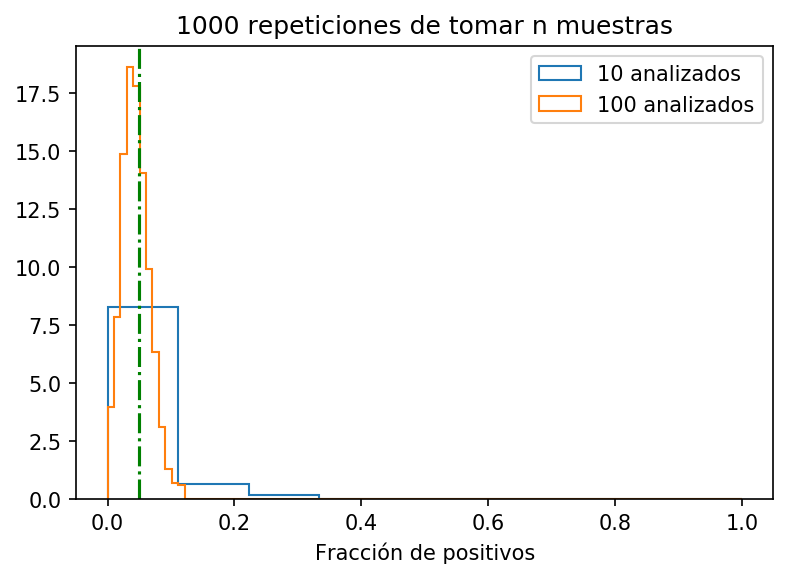

In [11]:
plt.figure(dpi=150)
plt.hist(s,density=True, bins=np.linspace(0,1,10),fill=False, histtype='step', label='10 analizados')
plt.hist(s2,density=True, bins=np.linspace(0,1,100),fill=False, histtype='step', label='100 analizados')
plt.title('1000 repeticiones de tomar n muestras')
plt.axvline(x=.05, color='g', linestyle='-.')
plt.xlabel('Fracción de positivos')
plt.legend()
plt.show()

# Binomial

Dada la proba individual de éxito $p$, te dice la distribución esperada de éxitos en $n$ tiradas

Pero uno muchas veces quiere al revés!

$\longrightarrow$ dado que hubo $k$ positivos, cuál es la distribución de probabilidad sobre la probabilidad de éxito individual, $p$ ?

$\Longrightarrow$ **Beta Distribution** por Bayes

# Beta Distribution

$$f(x: \alpha, \beta) = \frac{1}{B(\alpha,\beta)} x^{\alpha-1}\, (1-x)^{\beta-1}$$

Dados $\alpha-1$ casos positivos en $\alpha+\beta-2$ tiradas, $f(x: \alpha, \beta)$ es la distribución de probabilidad de que la probabilidad de éxito individual sea $p=x$

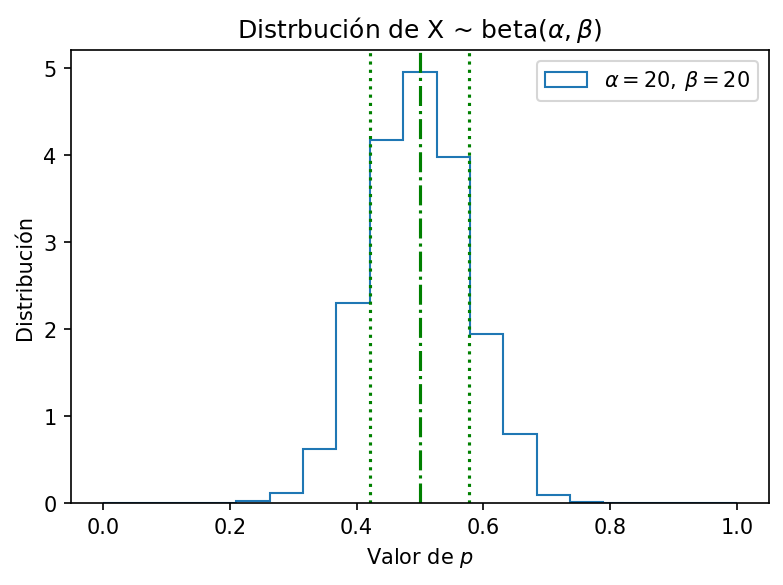

In [12]:
a = 20
b = 20
s = np.random.beta(a,b,2000)
plt.figure(dpi=150)
plt.hist(s,density=True, bins=np.linspace(0,1,20),fill=False, histtype='step', label='$\\alpha='+str(a)+',\, \\beta='+str(b)+'$')
plt.axvline(x=a/(a+b), color='g', linestyle='-.')
plt.axvline(x=a/(a+b)+sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.axvline(x=a/(a+b)-sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.title('Distrbución de X ~ beta($\\alpha,\\beta$)')
plt.xlabel('Valor de $p$')
plt.ylabel('Distribución')
plt.legend()
plt.show()

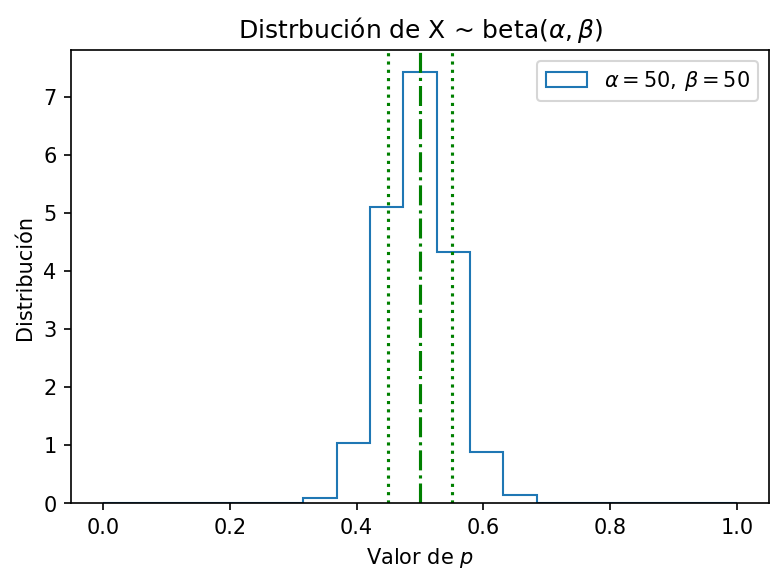

In [13]:
a = 50
b = 50
s = np.random.beta(a,b,2000)
plt.figure(dpi=150)
plt.hist(s,density=True, bins=np.linspace(0,1,20),fill=False, histtype='step', label='$\\alpha='+str(a)+',\, \\beta='+str(b)+'$')
plt.axvline(x=a/(a+b), color='g', linestyle='-.')
plt.axvline(x=a/(a+b)+sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.axvline(x=a/(a+b)-sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.title('Distrbución de X ~ beta($\\alpha,\\beta$)')
plt.xlabel('Valor de $p$')
plt.ylabel('Distribución')
plt.legend()
plt.show()

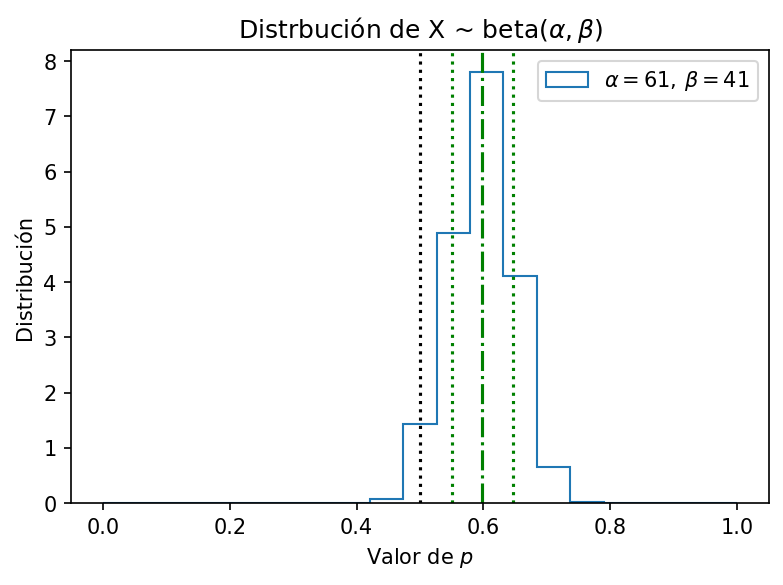

In [196]:
a = 61
b = 41
s = np.random.beta(a,b,2000)
plt.figure(dpi=150)
plt.hist(s,density=True, bins=np.linspace(0,1,20),fill=False, histtype='step', label='$\\alpha='+str(a)+',\, \\beta='+str(b)+'$')
plt.axvline(x=a/(a+b), color='g', linestyle='-.')
plt.axvline(x=a/(a+b)+sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.axvline(x=a/(a+b)-sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.axvline(0.5, color='black',linestyle=':')
plt.title('Distrbución de X ~ beta($\\alpha,\\beta$)')
plt.xlabel('Valor de $p$')
plt.ylabel('Distribución')
plt.legend()
plt.show()

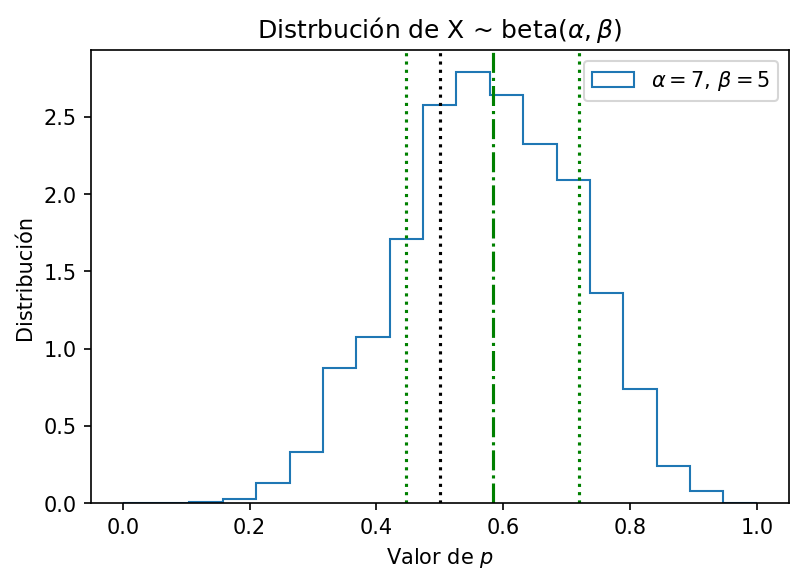

In [197]:
a = 7
b = 5
s = np.random.beta(a,b,2000)
plt.figure(dpi=150)
plt.hist(s,density=True, bins=np.linspace(0,1,20),fill=False, histtype='step', label='$\\alpha='+str(a)+',\, \\beta='+str(b)+'$')
plt.axvline(x=a/(a+b), color='g', linestyle='-.')
plt.axvline(x=a/(a+b)+sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.axvline(x=a/(a+b)-sqrt(a*b/((a+b+1)*(a+b)**2)), color='g', linestyle=':')
plt.axvline(0.5, color='black',linestyle=':')
plt.title('Distrbución de X ~ beta($\\alpha,\\beta$)')
plt.xlabel('Valor de $p$')
plt.ylabel('Distribución')
plt.legend()
plt.show()

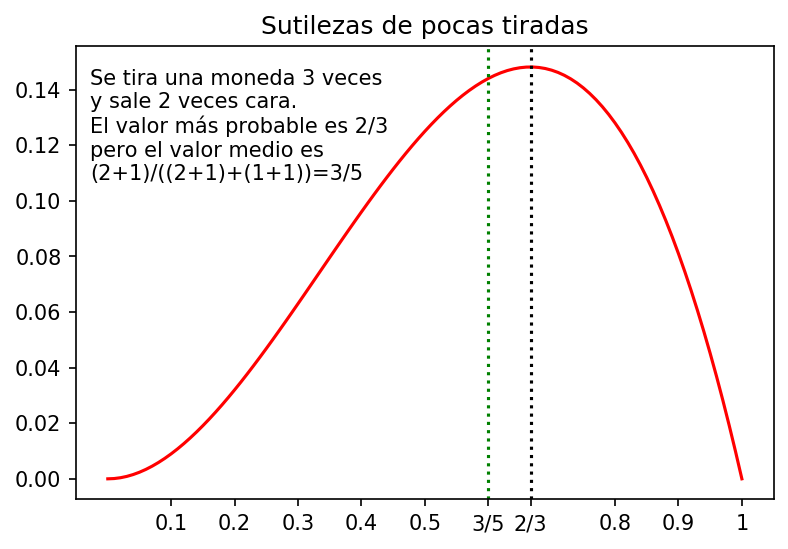

In [216]:
# Observar la sutileza de la distribución: como sólo se expande en [0,1], entonces en el valor medio siempre 
# habrá un 'corrimiento al centro' respecto del máximo.  O sea, en general no coinciden el máximo valor 
# probable con el valor medio.
p = np.linspace(0,1,101)
k = 2
n  = 3
plt.figure(dpi=150)
plt.plot(p, [(pj**k)*((1-pj)**(n-k)) for pj in p],'r-')
plt.axvline(2/3, color='black',linestyle=':')
plt.axvline(3/(3+2), color='green',linestyle=':')
plt.xticks([.1,.2,.3,.4,.5,3/5,2/3,.8,.9,1],[.1,.2,.3,.4,.5,'3/5','2/3',.8,.9,1])
plt.title('Sutilezas de pocas tiradas')
plt.text(.02,.95,'Se tira una moneda 3 veces\ny sale 2 veces cara.\nEl valor más probable es 2/3\npero el valor medio es\n(2+1)/((2+1)+(1+1))=3/5',ha='left',va='top', fontsize=10, color='black',transform = plt.gca().transAxes)
plt.show()

# Priors  

In [68]:
# Se despeja alpha y beta de las fórmulas de promedio y varianza y me hago la función para guardar
def estimate_beta_parameters(mu,var):
    alpha = ((1 - mu) / var - 1 / mu) * mu**2
    beta = alpha * (1 / mu - 1)
    return alpha, beta

In [82]:
a , b = estimate_beta_parameters(.1,.05**2)
print(a,b)

3.5 31.5


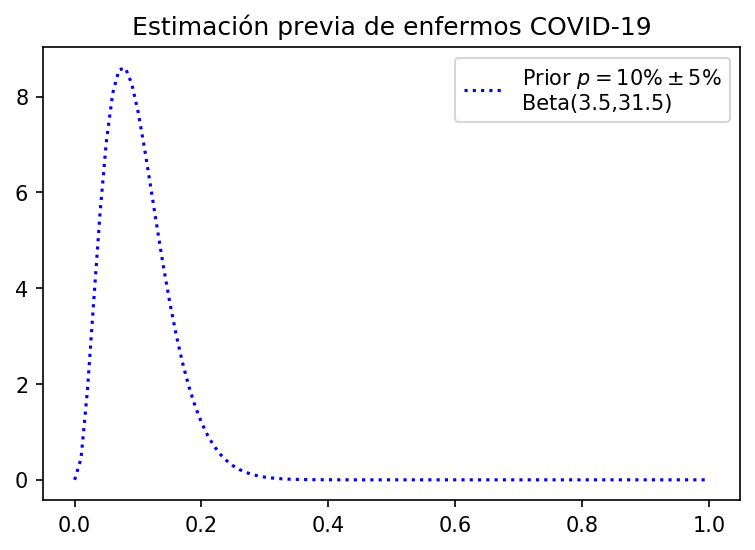

In [91]:
import scipy.stats as stats
xs = np.linspace(0,1,101)
plt.figure(dpi=150)
plt.plot(xs, stats.beta.pdf(xs,a=3.5, b=31.5),'b:',label='Prior $p=10\% \\pm 5\%$\nBeta(3.5,31.5)')
plt.title('Estimación previa de enfermos COVID-19')
plt.legend()
plt.show()

## Testeos masivos

Se realizan 300 testeos masivos y se obtienen 50 positivos y 250 negativos.

Entonces se updatea 

$$ Beta(3.5,31.5) \longrightarrow Beta(3.5+51, 31.5+251)$$

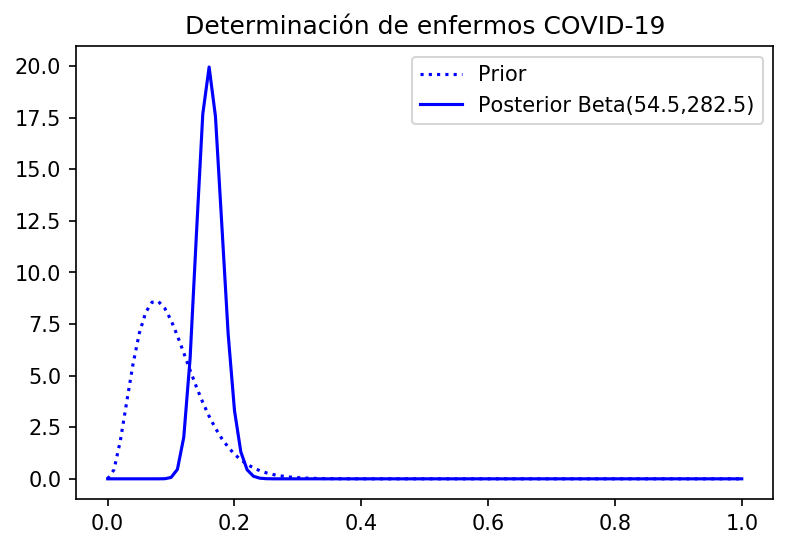

In [186]:
import scipy.stats as stats
xs = np.linspace(0,1,101)
plt.figure(dpi=150)
plt.plot(xs, stats.beta.pdf(xs,a=3.5, b=31.5),'b:',label='Prior')
plt.plot(xs, stats.beta.pdf(xs,a=54.5, b=282.5),'b-',label='Posterior Beta(54.5,282.5)')
plt.title('Determinación de enfermos COVID-19')
plt.legend()
plt.show()

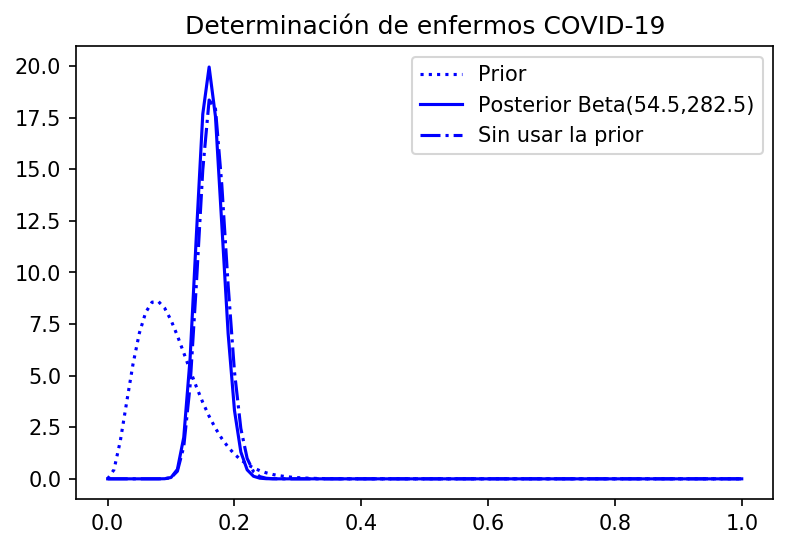

In [187]:
import scipy.stats as stats
xs = np.linspace(0,1,101)
plt.figure(dpi=150)
plt.plot(xs, stats.beta.pdf(xs,a=3.5, b=31.5),'b:',label='Prior')
plt.plot(xs, stats.beta.pdf(xs,a=54.5, b=282.5),'b-',label='Posterior Beta(54.5,282.5)')
plt.plot(xs, stats.beta.pdf(xs,a=50, b=251),'b-.',label='Sin usar la prior')
plt.title('Determinación de enfermos COVID-19')
plt.legend()
plt.show()

In [175]:
# Esta función me da cuánto mide el intervalo de 2 sigmas si mido n veces 
# algo que tiene probabilidad de éxito p
def intervalo(p, n):
    a = n*p+1
    b = n*(1-p)+1
    return 2*sqrt(a*b/((a+b+1)*(a+b)**2))
    #return a

# Este es un truco para que si al función recibe un array, entonces calcule elemento por elemento
vecfunc = np.vectorize(intervalo)


In [176]:
# Armo el canvas para ejecutar un plot de curvas de nivel
pp = np.linspace(0, 1, 100)
nn = np.linspace(0, 500, 301)

X, Y = np.meshgrid(pp, nn)
Z = vecfunc(X, Y)

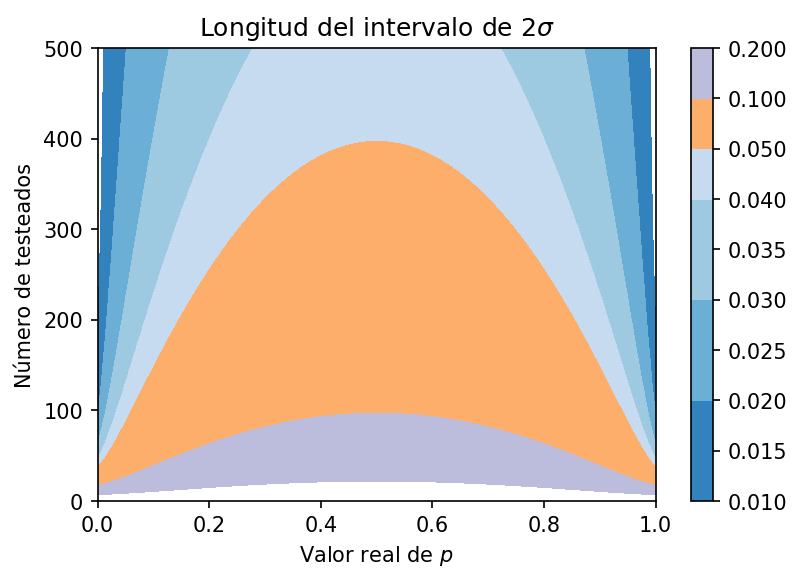

In [188]:
# Grafico las curvas de nivel
plt.figure(dpi=150)
plt.contourf(X, Y, Z,[.01,.015,.02,.025,.03,.035,.04,.05,.1,.2], cmap='tab20c')
plt.colorbar()
plt.title('Longitud del intervalo de 2$\sigma$')
plt.xlabel('Valor real de $p$')
plt.ylabel('Número de testeados')
plt.show()
